In [116]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import np_utils
import os,glob,pickle
import librosa

import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from sklearn.svm import SVC




In [117]:
## extracting do not use
def extract(data,sr):
    
    stft=np.abs(librosa.stft(data))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(data, sr=sr).T,axis=0)
    result=np.hstack((result, mel))
    
    
    return result
emotions={
  1:'neutral',
  2:'calm',
  3:'happy',
  4:'sad',
  5:'angry',
  6:'fearful',
  7:'disgust',
  8:'surprised'}
x=[]
y=[]

#path name to be specified
for file in glob.glob(r"C:\Users\DELL\Desktop\projct\mldata\Actor_*\\*.wav"):#give path for the dataset
    f=os.path.basename(file)
    emotion=f.split("-")[2]
    data,sr=sf.read(file,dtype="float32")
    features=extract(data,sr)
    x.append(features)
    y.append(emotion)


Text(0, 0.5, 'Cumulative explained variance')

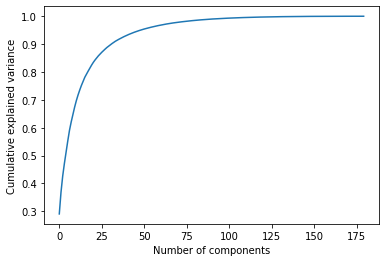

In [118]:
#train_test_split,encoding,scaler

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)
le=LabelEncoder()
y_test=le.fit_transform(y_test)
y_train=le.fit_transform(y_train)

pca = PCA(n_components=180)
pca.fit(X_sc_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



In [119]:
#PCA
pca=PCA(n_components=100,svd_solver ='randomized')
X_pca_train=pca.fit_transform(X_sc_train)
X_pca_test=pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)
pd.DataFrame(X_pca_train)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.519011,-0.029527,0.560156,-1.962477,-1.690145,0.338671,2.883784,-0.153616,-0.409595,-1.249788,...,0.030418,-0.063060,-0.163882,-0.067705,-0.181329,-0.025264,-0.042473,0.211848,-0.108651,-0.414437
1,1.813085,-0.727379,-0.893807,1.869317,1.686283,-1.894197,-3.213508,1.087941,-0.978512,-1.199431,...,-0.175873,0.189716,-0.543452,-0.190916,-0.036198,0.086784,-0.192380,-0.397190,-0.361841,0.047331
2,16.397959,3.846877,-1.909592,4.140775,6.619879,-1.666509,3.804926,-14.192289,-7.139220,-4.516089,...,-0.466945,0.046991,-0.114867,-0.357074,-0.480712,0.388053,0.285033,0.694021,-0.576909,0.180223
3,-3.786599,-0.019709,0.355529,-1.487574,-2.133292,-0.408266,2.893350,1.619350,-0.517659,0.034968,...,0.060077,-0.280693,0.232598,-0.181155,-0.221962,-0.410359,-0.058753,-0.106725,-0.085423,0.113001
4,-3.489223,-0.148614,0.257400,-0.535260,-0.933514,-0.497012,0.988519,2.154222,-0.716543,1.079247,...,0.204574,0.094153,-0.173915,-0.062894,0.136676,0.515138,0.541629,-0.133023,0.008825,-0.332299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-3.505158,-0.012941,0.631674,-2.407199,-2.581458,0.144886,3.433603,0.267390,-0.291457,-0.520071,...,-0.194514,-0.134767,-0.164536,-0.217829,0.090803,0.047691,-0.124489,0.276530,-0.138392,0.134149
1076,-2.878445,-0.198072,-0.540969,1.826062,1.242072,-0.649675,-2.744067,0.834804,-0.159321,1.045351,...,-0.038544,0.050282,0.118103,0.271434,-0.163448,-0.121305,-0.213313,-0.056632,0.009506,0.108660
1077,-0.869213,0.773143,1.617120,-1.854730,0.355767,1.056049,2.146414,1.592738,-0.352845,0.330211,...,0.072151,0.255422,0.123695,-0.095030,-0.170961,0.432397,-0.014879,-0.332022,0.272889,0.185184
1078,33.267912,9.803032,22.917530,15.191324,16.789295,8.605229,11.973011,6.842334,3.531190,-25.401766,...,0.522961,0.588668,-0.222359,-0.089683,0.723156,0.150911,-0.045300,0.342786,0.092729,0.454942


In [120]:
#model creation
model =tf.keras.Sequential()
layers = 4
units = 256

model.add(Dense(units, input_dim=100, activation='relu'))
model.add(GaussianNoise(pca_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(X_pca_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 4ms/step - loss: 5.1860 - accuracy: 0.1259
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 4.4490 - accuracy: 0.1741
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 4.0836 - accuracy: 0.1731
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 3.9042 - accuracy: 0.1833
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 3.6690 - accuracy: 0.1741
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 3.4443 - accuracy: 0.1815
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 3.1806 - accuracy: 0.1880
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 3.0435 - accuracy: 0.1944
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 2.9003 - accuracy: 0.2028
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 2.6763 - accuracy: 0.2222
Epoch 11/

34/34 [==============================] - 0s 5ms/step - loss: 1.0022 - accuracy: 0.6426
Epoch 83/200
34/34 [==============================] - 0s 5ms/step - loss: 1.0267 - accuracy: 0.6250
Epoch 84/200
34/34 [==============================] - 0s 5ms/step - loss: 0.9893 - accuracy: 0.6370
Epoch 85/200
34/34 [==============================] - 0s 5ms/step - loss: 0.9905 - accuracy: 0.6472
Epoch 86/200
34/34 [==============================] - 0s 5ms/step - loss: 0.9491 - accuracy: 0.6519
Epoch 87/200
34/34 [==============================] - 0s 7ms/step - loss: 0.9577 - accuracy: 0.6454
Epoch 88/200
34/34 [==============================] - 0s 7ms/step - loss: 1.0045 - accuracy: 0.6454
Epoch 89/200
34/34 [==============================] - 0s 6ms/step - loss: 0.9954 - accuracy: 0.6333
Epoch 90/200
34/34 [==============================] - 0s 8ms/step - loss: 0.9213 - accuracy: 0.6611
Epoch 91/200
34/34 [==============================] - 0s 7ms/step - loss: 0.9786 - accuracy: 0.6546
Epoch 92/200


34/34 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.8269
Epoch 163/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.8241
Epoch 164/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.8491
Epoch 165/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.8426
Epoch 166/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.8287
Epoch 167/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.8389
Epoch 168/200
34/34 [==============================] - 0s 5ms/step - loss: 0.5068 - accuracy: 0.8287
Epoch 169/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.8380
Epoch 170/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4927 - accuracy: 0.8361
Epoch 171/200
34/34 [==============================] - 0s 7ms/step - loss: 0.4405 - accuracy: 0.8444
Epoc

In [125]:
model.evaluate(X_pca_test,y_test,verbose=0)

[2.0569450855255127, 0.6527777910232544]

In [126]:
#predicting
y_pred=model.predict(X_pca_test) 
y_pred=y_pred.argmax(axis=1)
#y_pred=le.inverse_transform(y_pred)
#y_test=le.inverse_transform(y_test)
#printing
for l in y_pred:
    #print(emotions[l+1])
    continue





In [127]:
#using gradient boosting
gbc=GradientBoostingClassifier(learning_rate=0.2,max_depth=5,random_state=0).fit(X_pca_train,y_train)

y_pred=gbc.predict(X_pca_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.55

In [128]:
#Saving model
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\DELL\ML\saved_models\Emotion_Model.h5 
